<a href="https://colab.research.google.com/github/OracyC/6560-MachineLearning-ClassNotes/blob/master/Copy_of_final_2019_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Fundamentals Final
# enter your name here

"I pledge under the RPI honor code that I have completed this work on my own." 

At any time a monitor may ask you to scroll up to the top of this document to view this. 


In [0]:
#This just gets the data and preps the environment. 
data="https://www.dropbox.com/s/7kbq1hi31a7tnzt/data.zip"

In [48]:
!wget $data

--2019-12-16 00:37:40--  https://www.dropbox.com/s/7kbq1hi31a7tnzt/data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7kbq1hi31a7tnzt/data.zip [following]
--2019-12-16 00:37:41--  https://www.dropbox.com/s/raw/7kbq1hi31a7tnzt/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc709298372fe14f0828c39c487c.dl.dropboxusercontent.com/cd/0/inline/AuWpmQLQ8kUT0DG7CcyjujzduhAlAw85zgQ4MUc4B_0cYWKpc-DFHNSqt5GtveFEPzmzXf4qxV4zHUiu8GVltIBMLIAd2XgUtw946I5D-itZwA/file# [following]
--2019-12-16 00:37:41--  https://uc709298372fe14f0828c39c487c.dl.dropboxusercontent.com/cd/0/inline/AuWpmQLQ8kUT0DG7CcyjujzduhAlAw85zgQ4MUc4B_0cYWKpc-DFHNSqt5GtveFEPzmzXf4qxV4zHUiu8GVltIBMLIAd2XgUtw946I5D-itZwA/file
Resolving uc709298372fe14f0828c

In [49]:
!unzip -o data.zip

Archive:  data.zip
  inflating: data/ma/medications.csv  
  inflating: data/ma/providers.csv   
  inflating: data/ma/imaging_studies.csv  
  inflating: data/ma/allergies.csv   
  inflating: data/ma/procedures.csv  
  inflating: data/ma/organizations.csv  
  inflating: data/ma/conditions.csv  
  inflating: data/ma/careplans.csv   
  inflating: data/ma/encounters.csv  
  inflating: __MACOSX/data/ma/._encounters.csv  
  inflating: data/ma/immunizations.csv  
  inflating: data/ma/patients.csv    
  inflating: data/ma/observations.csv  
  inflating: data/ny/medications.csv  
  inflating: data/ny/providers.csv   
  inflating: data/ny/imaging_studies.csv  
  inflating: data/ny/allergies.csv   
  inflating: data/ny/procedures.csv  
  inflating: data/ny/organizations.csv  
  inflating: data/ny/conditions.csv  
  inflating: data/ny/careplans.csv   
  inflating: data/ny/encounters.csv  
  inflating: __MACOSX/data/ny/._encounters.csv  
  inflating: data/ny/immunizations.csv  
  inflating: data/ny/

This is healthcare data generated from a syntetic data generator.  We want to see how good it is. 

In [50]:
#Let's list the files
!ls ./data/ma


allergies.csv	encounters.csv	     medications.csv	patients.csv
careplans.csv	imaging_studies.csv  observations.csv	procedures.csv
conditions.csv	immunizations.csv    organizations.csv	providers.csv


In [51]:
#Let's look at one of the dataframes
import numpy as np
import pandas as pd
careplans_ma= pd.read_csv('./data/ma/careplans.csv')
careplans_ny= pd.read_csv('./data/ny/careplans.csv')
careplans_ma


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,39780635-39e3-4ed7-b5b3-89de1d212c12,2009-08-23,2009-09-13,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,c922b9ed-6c6e-40ac-a309-112439f732c7,225358003,Wound care,283371005.0,Laceration of forearm
1,c121a7f7-12ed-41ce-a2d6-3cb90d636b43,2006-06-28,2016-11-16,dc5eb62e-b6d4-4bad-9351-68bee90d0d67,fcd1c37b-da0b-4f19-9d41-3e44bec198d0,134435003,Routine antenatal care,72892002.0,Normal pregnancy
2,c5a88bac-818b-42ac-8a32-3dea7cd21750,2010-07-05,2010-08-04,e063f4be-c0c7-4005-aecd-b28768912efd,add5b5ef-9cea-4f95-91a3-2740df4f2b86,385691007,Fracture care,65966004.0,Fracture of forearm
3,d2be914f-49a1-4de7-9ade-b73dbe7362da,2013-08-11,2013-10-10,dc5eb62e-b6d4-4bad-9351-68bee90d0d67,f90e3839-c185-4a3a-8371-2920efdf7223,385691007,Fracture care,58150001.0,Fracture of clavicle
4,a7074eb2-8f00-421d-923c-b286a6afba31,2009-08-03,2009-11-01,14d1d8e4-5124-4638-972a-78d3e3edfb03,3673de56-88be-4062-8514-a6bb1541f329,385691007,Fracture care,58150001.0,Fracture of clavicle
...,...,...,...,...,...,...,...,...,...
7961,9bd7d4fa-0552-4c27-8afe-0266b212a4b2,1979-06-20,NaN,01f2f71f-9766-4931-bf57-ef8a5c95f48c,423c0565-04f1-4d33-b739-7082544d0cf7,698360004,Diabetes self management plan,15777000.0,Prediabetes
7962,71d03dc7-7a8d-4aa1-aec1-f3cf165e582a,1981-02-11,NaN,01f2f71f-9766-4931-bf57-ef8a5c95f48c,2ab2a9d7-89a6-4934-bf8a-a9a7ac3b4723,134435003,Routine antenatal care,72892002.0,Normal pregnancy
7963,07993859-7258-47e6-a35b-9302c6868752,1990-12-09,NaN,01f2f71f-9766-4931-bf57-ef8a5c95f48c,bf596018-72e6-418d-94fb-ad1ad62cc71f,872781000000100,Musculoskeletal care,239872002.0,Osteoarthritis of hip
7964,a8f7843d-7b7c-4e37-b266-80faa6567ea7,1996-09-18,NaN,01f2f71f-9766-4931-bf57-ef8a5c95f48c,455949e1-e69d-46b5-af9f-4ccbed1baca8,736285004,Hyperlipidemia clinical management plan,55822004.0,Hyperlipidemia


# Exploratory Data Analysis 

The data directory includes a wide variety of data related to health care.  
    
(1. 5 points) Find the mean of the `COST` varaiable in the `encounters.csv` data for both NY and MA, assigning the values to `cost_ny` and `cost_ma`.   





In [52]:
# Answer 1

#Load the data
encounters_ma = pd.read_csv('./data/ma/encounters.csv')
encounters_ny = pd.read_csv('./data/ny/encounters.csv')
cost_ma=encounters_ma['COST'].mean() # Fix this to calculate the mean of the cost. (5 points)
cost_ny=encounters_ny['COST'].mean() #Fix this to calculate the mean of the cost. (5 points)
print( cost_ma, cost_ny)
print ("___", "    If you are seeing a face, probably aren't there yet. ")

17.906257207081175 15.188246329742485
___     If you are seeing a face, probably aren't there yet. 


# Cost Regression Analysis

### Dummy Creation and Split to Train and Test for NY ONLY 

The goal of the code below is to predict the `COST` from `CODE` and `ENCOUNTERCLASS`.  


(2. 5 points) First create dummy variables from `CODE` and `ENCOUNTERCLASS`.  Don't use any other variables.  split your data into an 70% train and 30% validation using a `random_state` of 111. For validation, set: 

```
splittest1 = X_train.iloc[5,2]

splittest2 = X_test.iloc[7,4]
```




In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Create Dummies. Also set  dummy_na = True
encounters_ny_tarin = encounters_ny[['CODE','ENCOUNTERCLASS']]
encounters_ny_tarin = pd.get_dummies(encounters_ny_tarin, columns=['CODE','ENCOUNTERCLASS'], dummy_na=True)
#y ='COST'
y = encounters_ny['COST']
#X_train, X_test, y_train, y_test is the naming you should use
#verify split
X_train, X_test, y_train, y_test = train_test_split(encounters_ny_tarin, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=111)
#keep this code used for testing. 
splittest1 = X_train.shape
splittest2 = X_test.iloc[7,4]
print(splittest1, splittest2)

(72930, 40) 0


### Predict Cost via Linear Regression 

(3. 5 points) Using linear regression analysis, use the `CODE` and `ENCOUNTERCLASS` as independent variables to predict `COST`. This is your naive model. Report R-Squared for both training `r2_train_cost` and validation `r2_test_cost`. 




In [54]:
#3 Answer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
predict_train = lr.predict(X_train)
predict_test = lr.predict(X_test)
r2_train_cost = lr.score(X_train,y_train) # Make equal to the R2. 
r2_test_cost = lr.score(X_test,y_test)# Make equal to the R2. 

#Keep this
print('R2 for Train:', r2_train_cost)
print('R2 for Test (cross validation)：', r2_test_cost )

R2 for Train: 0.6964551409590365
R2 for Test (cross validation)： 0.6983619671189338


# Create Graph of Encounter class vs Cost

(4. 5 points) Create a graph of encounter class vs cost. It should look like the graph below (created via seaborn). 


In [0]:
%matplotlib inline

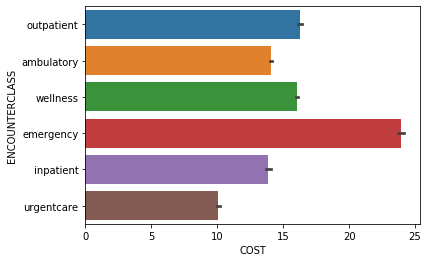

In [56]:
#4 Answer
import seaborn as sns

ax = sns.barplot(x="COST", y="ENCOUNTERCLASS", data=encounters_ny)

When you are done, your graph should look like this.  

ENCOUNTERCLASS is on the Y axis and  and COST on X axis.

![Imgur](https://i.imgur.com/asCDZSM.png)


# High Cost Patients Classification 

A second Challenge is determine the most expensive individuals.  This is set as all those groups that are more than 1 standard deviation above the mean, indicated as 'HIGHCOST' in the dataset.  

(5. 5 points) 
Overall, count the total number of individuals who are high cost in NY (i.e., where encounters_ny['HIGHCOST'] is equal to 1.) Assign to the value `total_high_cost_ny`. 

Overall, count the total number of individuals who are high cost in MA (i.e., where encounters_ny['HIGHCOST'] is equal to 1.) Assign to the value `total_high_cost_ma`. 




In [57]:
#5 Answer 
total_high_cost_ny=encounters_ny[encounters_ny['HIGHCOST'] == 1].shape[0]  #set to the sum
total_high_cost_ma=encounters_ma[encounters_ma['HIGHCOST'] == 1].shape[0]  #set to the sum

print(total_high_cost_ny, total_high_cost_ma)

21558 22505


### Split the Train and test set for Classification with you DV set to HIGHCOST for NY Only. 


(6. 5 points) First split your data into an 70% train and 30% validation. Make sure that the results are *stratified* (equal classes in train and test) with `random_state = 111`.  

Also set the following:

```
splittest3 = y_train.iloc[5]
splittest4 = y_test.iloc[3]
```


In [58]:
#6 Answer 
#Set y equal to train encounters_ny['HIGHCOST'] 
y = encounters_ny['HIGHCOST']
#X_train, X_test, y_train, y_test  is the naming you should use
X_train, X_test, y_train, y_test = train_test_split(encounters_ny_tarin,y,train_size=0.7, test_size=0.3, stratify=y, random_state=111)
#This will be used for testing. Keep it. 
splittest3 = y_train.iloc[3]
splittest4 = y_test.iloc[17]
print (splittest3, splittest4)

1 1


### Classification with Random Forests


(8. 5 points) Use a RandomForestClassifier to predict the 'HIGH_COST' with use the `CODE` and `ENCOUNTERCLASS` as independent variables.  

Also set the following:

```
train_accuracy
test_accuracy
```

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict_train1=rf.predict(X_train)
predict_test1=rf.predict(X_test)
train_accuracy = metrics.accuracy_score(predict_train1,y_train)#set to the accuracy
test_accuracy = metrics.accuracy_score(predict_test1,y_test) #set to the accuracy
#Keep this.
print("Classifier Accuracy for Train: ", train_accuracy )
print("Classifier Accuracy for Test: ", test_accuracy )

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classifier Accuracy for Train:  0.8849033319621555
Classifier Accuracy for Test:  0.8817826977220373


### Submission
For the final submission, please submit a link to this notebook to the LMS as a `.ipynb` file.  The TA must be able to run your notebook.  

### Please make sure that your notebook above this point runs without errors.  